In [284]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 200)

## Feature engineering

In [285]:
# Creating the datasets
house_data_train = pd.read_csv("train.csv")
house_data_test = pd.read_csv("test.csv")
# Target prices:
y = house_data_train['SalePrice']
house_data_train = house_data_train.drop(columns=['SalePrice'])
house_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [286]:
# Values and meanings from the first column, MSSubClass
MSSubClass_dict = { 
        20:	'1-STORY 1946 & NEWER ALL STYLES', 
        30:	'1-STORY 1945 & OLDER', 
        40:	'1-STORY W/FINISHED ATTIC ALL AGES',
        45:	'1-1/2 STORY - UNFINISHED ALL AGES', 
        50:	'1-1/2 STORY FINISHED ALL AGES', 
        60:	'2-STORY 1946 & NEWER', 
        70:	'2-STORY 1945 & OLDER', 
        75:	'2-1/2 STORY ALL AGES', 
        80:	'SPLIT OR MULTI-LEVEL', 
        85:	'SPLIT FOYER', 
        90:	'DUPLEX - ALL STYLES AND AGES', 
       120:	'1-STORY PUD (Planned Unit Development) - 1946 & NEWER', 
       150:	'1-1/2 STORY PUD - ALL AGES', 
       160:	'2-STORY PUD - 1946 & NEWER', 
       180:	'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER', 
       190:	'2 FAMILY CONVERSION - ALL STYLES AND AGES'}

# Replacing numbers with column names
house_data_train['MSSubClass'].replace(MSSubClass_dict, inplace=True)
house_data_test['MSSubClass'].replace(MSSubClass_dict, inplace=True)

In [287]:
categorical_columns = list(house_data_train.dtypes[house_data_train.dtypes == np.object].index)
numerical_columns = list(house_data_train.dtypes[house_data_train.dtypes != np.object].index)

In [288]:
# Numerical and categorical dataframes
numerical_train = house_data_train[numerical_columns]
numerical_test = house_data_test[numerical_columns]
categorical_train = house_data_train[categorical_columns]
categorical_test = house_data_test[categorical_columns]

In [289]:
# Meanings of the Condition1 and Condition2 column values
cond = {
    'Artery':	'Adjacent to arterial street',
    'Feedr':	'Adjacent to feeder street',	
    'Norm':	'Normal',	
    'RRNn':	'Within 200 of North-South Railroad',
    'RRAn':	'Adjacent to North-South Railroad',
    'PosN':	'Near positive off-site feature--park, greenbelt, etc.',
    'PosA':	'Adjacent to postive off-site feature',
    'RRNe':	'Within 200 of East-West Railroad',
    'RRAe':	'Adjacent to East-West Railroad'
}
# Getting the full name of the conditions
categorical_train['Condition1'].replace(cond, inplace=True)
categorical_train['Condition2'].replace(cond, inplace=True)
categorical_test['Condition1'].replace(cond, inplace=True)
categorical_test['Condition2'].replace(cond, inplace=True)

/usr/local/lib/python3.8/site-packages/pandas/core/generic.py:6610: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [290]:
def sum_1hots(df, column1, column2):
    '''This function is for getting only one hot encoder for repeated 
    conditions in some columns in the dataset '''
    c1 = pd.get_dummies(df[column1])
    c2 = pd.get_dummies(df[column2])
    # Sum both one hot encoders. Exploring this data, I found some 2's, that makes 
    # no sense, so, I replaced them with 1's
    c1c2 = c1.add(c2, fill_value=0).replace(2,1)
    df = df.drop(columns=[column1, column2])
    return df, c1c2

In [291]:
categorical_train, cond_col_train = sum_1hots(categorical_train, 'Condition1', 'Condition2')
categorical_train, ext_col_train = sum_1hots(categorical_train, 'Exterior1st', 'Exterior2nd')
categorical_test, cond_col_test = sum_1hots(categorical_test, 'Condition1', 'Condition2')
categorical_test, ext_col_test = sum_1hots(categorical_test, 'Exterior1st', 'Exterior2nd')

### Handling zero values

In [292]:
categorical_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 40 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1460 non-null   object
 1   MSZoning       1460 non-null   object
 2   Street         1460 non-null   object
 3   Alley          91 non-null     object
 4   LotShape       1460 non-null   object
 5   LandContour    1460 non-null   object
 6   Utilities      1460 non-null   object
 7   LotConfig      1460 non-null   object
 8   LandSlope      1460 non-null   object
 9   Neighborhood   1460 non-null   object
 10  BldgType       1460 non-null   object
 11  HouseStyle     1460 non-null   object
 12  RoofStyle      1460 non-null   object
 13  RoofMatl       1460 non-null   object
 14  MasVnrType     1452 non-null   object
 15  ExterQual      1460 non-null   object
 16  ExterCond      1460 non-null   object
 17  Foundation     1460 non-null   object
 18  BsmtQual       1423 non-null

In [293]:
# Replacing with a string the nan values. While exploring what kind of nan values we have in the data, 
# is ok to fill with a Not Aplicable condition. (no basement, no pool, etc)
categorical_train.fillna('Not Aplicable', inplace=True)
categorical_test.fillna('Not Aplicable', inplace=True)

In [294]:
# With the numerical columns, we only have one that is special, the 
# year when the garage was built, we fill with the average year
avg_garage_year = numerical_train['GarageYrBlt'].mean()
numerical_train['GarageYrBlt'].fillna(avg_garage_year, inplace=True)
numerical_test['GarageYrBlt'].fillna(avg_garage_year, inplace=True)
# The other values can be 0
numerical_train.fillna(0, inplace=True)
numerical_test.fillna(0, inplace=True)

/usr/local/lib/python3.8/site-packages/pandas/core/generic.py:6383: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.8/site-packages/pandas/core/frame.py:5171: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


### Creating and appending the One Hot Encoders for each categorical column

In [295]:
def drop_concat(df, one_hot, column):
    '''This function accepts a dataframe and a column name. It will get the 
    one hot encoder for categorical column, then, drop it from the original
    dataframe and cancatenate the one hot encoder'''
    df = df.drop(columns=[column])
    df = pd.concat([df, one_hot], axis=1)
    return df

In [296]:
def complete_categorical(df1, df2):
    '''Sometimes there are values not present in the test and train set, and
    in the one hot encoder this result in different number of columns. In 
    order to have control over it, this function completes those columns with 0'''
    cdf1 = df1.columns
    cdf2 = df2.columns
    for not_in_df2 in cdf1.difference(cdf2):
        df2[not_in_df2] = 0
    for not_in_df1 in cdf2.difference(cdf1):
        df1[not_in_df1] = 0
    df1 = df1.reindex(sorted(df1.columns), axis=1)
    df2 = df2.reindex(sorted(df2.columns), axis=1)
    return df1, df2

In [297]:
categorical_train, bsmt_col_train = sum_1hots(categorical_train, 'BsmtFinType1', 'BsmtFinType2')
categorical_test, bsmt_col_test = sum_1hots(categorical_test, 'BsmtFinType1', 'BsmtFinType2')


In [298]:
# Using the custom functions to get completes categorical train and test set
for column in categorical_test.columns:
    OH_train = pd.get_dummies(categorical_train[column])
    OH_test = pd.get_dummies(categorical_test[column])
    OH_train, OH_test = complete_categorical(OH_train, OH_test)
    categorical_train = drop_concat(categorical_train, OH_train, column)
    categorical_test = drop_concat(categorical_test, OH_test, column)

In [299]:
# Appending the sum of one hot encoders created previously and completing missing columns
hot_sums_train = [bsmt_col_train, cond_col_train, ext_col_train]
hot_sums_test = [bsmt_col_test, cond_col_test, ext_col_test]
for i in range(len(hot_sums_train)):
    complete_hot_sums_train, complete_hot_sums_test = complete_categorical(hot_sums_train[i], hot_sums_test[i])
    categorical_train = pd.concat([categorical_train, complete_hot_sums_train], axis=1)
    categorical_test = pd.concat([categorical_test, complete_hot_sums_test], axis=1)

In [300]:
len(categorical_train.columns)

262

In [301]:
len(categorical_test.columns)

262

### Normalizing the numerical data

In [302]:
from sklearn import preprocessing
#Train set
xnumerical_train = numerical_train.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
xnumerical_train_scaled = min_max_scaler.fit_transform(xnumerical_train)

# Test set
xnumerical_test = numerical_test.values #returns a numpy array
xnumerical_test_scaled = min_max_scaler.fit_transform(xnumerical_test)
# Filling NaN values with 0
xnumerical_test_scaled[np.isnan(xnumerical_test_scaled)] = 0

### Getting the whole dataset

In [303]:
processed_train = np.append(xnumerical_train_scaled, categorical_train.values, axis=1)
processed_test = np.append(xnumerical_test_scaled, categorical_test.values, axis=1)

### Correlations 

In [304]:
# norm_train = pd.DataFrame(data = processed_train, columns=categorical_train.columns.append(numerical_train.columns))
# norm_train = pd.concat([norm_train, y], axis=1)
# norm_train

In [305]:
# corr_matrix = norm_train.corr()
# (corr_matrix['SalePrice']
# .sort_values(ascending=False)
# .where(((corr_matrix['SalePrice'] < -0.05) | (corr_matrix['SalePrice'] > 0.05)), other=np.nan)
# .dropna()
# )

## Machine Learning Models

In [306]:
from sklearn.metrics import mean_squared_log_error
y_max = np.max(y.values)

In [307]:
import csv
def make_csv(model:str, predictions):    
    j = 1461
    with open(f'predictions_{model}.csv', 'w') as p:
        writer = csv.writer(p)
        writer.writerow(['Id','SalePrice'])
        for pred in predictions:
            writer.writerow([j,pred])
            j += 1

### Support Vector regresor
Loss = 0.14645, Kaggle leaderboard: 2199

In [308]:
from sklearn import svm
regr = svm.SVR(C=1, epsilon=0.0001)
regr.fit(processed_train, y.values/y_max)
predictions_svm_train = regr.predict(processed_train) * y_max
predictions_svm = regr.predict(processed_test) * y_max
make_csv('svm', predictions_svm)
mean_squared_log_error(y.values, predictions_svm_train)

array([125980.34192911, 157461.02718778, 184418.2592672 , ...,
       178274.97404368, 108263.85923086, 206078.70600268])

### SGD Regression
Loss = 0.33743

In [427]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor(loss='squared_epsilon_insensitive', max_iter=10000, learning_rate='adaptive', epsilon=0.001, alpha=0.001)
sgd.fit(processed_train, y.values/y_max)
predictions_sgd_train = sgd.predict(processed_train) * y_max
predictions_sgd = sgd.predict(processed_test) * y_max
make_csv('sgd', predictions_sgd)
mean_squared_log_error(y.values, predictions_sgd_train)

0.01591590576465964

### Neural net
Loss = 0.17504 

In [428]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.losses import MeanSquaredLogarithmicError

In [511]:
model = Sequential([
  Dense(1028, input_dim=processed_train.shape[1]),
  Dropout(0.3),
  Dense(512, activation='relu'),
  Dropout(0.1),
  Dense(512, activation='relu'),
  Dropout(0.1),
  Dense(256, activation='relu'),
  Dense(128, activation='relu'),
  Dense(64, activation='relu'),
  Dense(64, activation='relu'),
  Dense(1, activation='linear')
])

In [515]:
msle = MeanSquaredLogarithmicError()
model.compile(
    loss=msle, 
    optimizer=Adam(learning_rate=0.002), 
    metrics=[msle]
)
# train the model
history = model.fit(
    processed_train, 
    y.values/y_max, 
    epochs=50,
    validation_split=0.1
)

Epoch 1/50
42/42 [==============================] - 2s 26ms/step - loss: 9.7955e-04 - mean_squared_logarithmic_error: 9.6898e-04 - val_loss: 9.3524e-04 - val_mean_squared_logarithmic_error: 9.1069e-04
Epoch 2/50
42/42 [==============================] - 1s 22ms/step - loss: 6.9447e-04 - mean_squared_logarithmic_error: 7.1926e-04 - val_loss: 0.0016 - val_mean_squared_logarithmic_error: 0.0016
Epoch 3/50
42/42 [==============================] - 1s 24ms/step - loss: 7.9610e-04 - mean_squared_logarithmic_error: 7.7876e-04 - val_loss: 7.7568e-04 - val_mean_squared_logarithmic_error: 7.4953e-04
Epoch 4/50
42/42 [==============================] - 1s 26ms/step - loss: 7.2318e-04 - mean_squared_logarithmic_error: 7.1150e-04 - val_loss: 0.0011 - val_mean_squared_logarithmic_error: 0.0011
Epoch 5/50
42/42 [==============================] - 1s 18ms/step - loss: 8.0606e-04 - mean_squared_logarithmic_error: 7.9234e-04 - val_loss: 0.0010 - val_mean_squared_logarithmic_error: 0.0010
Epoch 6/50
42/42 [=

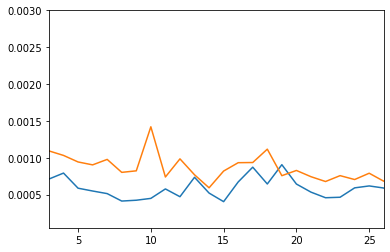

In [516]:
plt.axis([3, 26, 0.00005, 0.003])
plt.plot(history.history['mean_squared_logarithmic_error'])
plt.plot(history.history['val_mean_squared_logarithmic_error'])

In [514]:
nn_pred = model.predict(processed_test) * y_max
make_csv('nn', np.reshape(nn_pred, -1))